Importing the Required Libraries to train a machine learning classification model that predicts which passengers survived the Titanic shipwreck.


In [ ]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


The Dataset used for this project was gotten from https://www.kaggle.com/c/titanic.

The aim of this project is to create a machine learning classification model that predicts which passengers survived the Titanic shipwreck.



In [ ]:
# ===============================
# 2. LOAD DATA
# ===============================
df = pd.read_csv("/content/drive/MyDrive/Titanic Dataset/train.csv")

In [ ]:
print("Dsiplaying the First 5 Rows of Data \n")
df.head()

Dsiplaying the First 5 Rows of Data 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ===============================
# 3. DATA INSPECTION
# ===============================
print("\n \nChecking for Columns Info \n")
print(df.info())
print("\n \n Checking for Statical info of Data \n")
print(df.describe())
print("\n \n Checking for Columns with Null Values \n")
print(df.isnull().sum())


 
Checking for Columns Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 
 Checking for Statical info of Data 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383

Initial Data Exploration

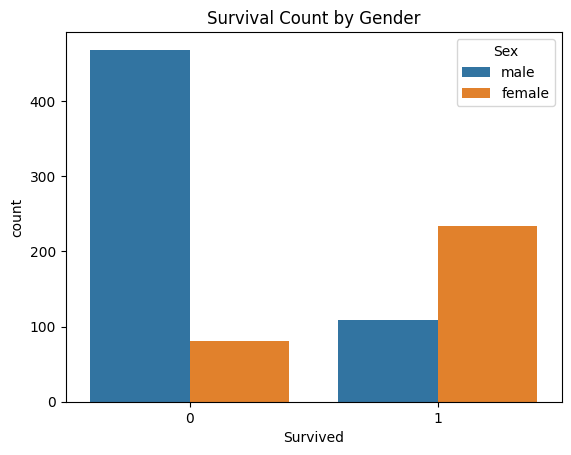

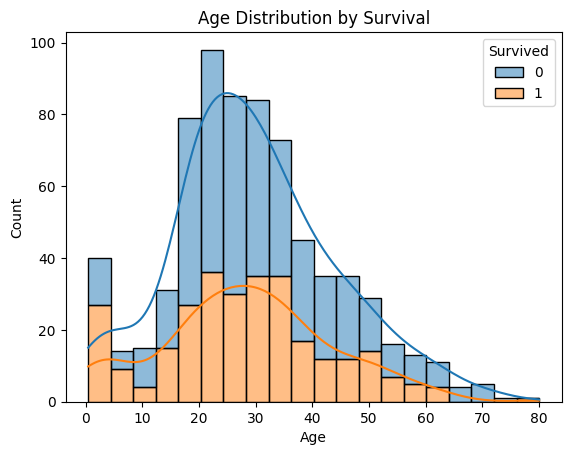

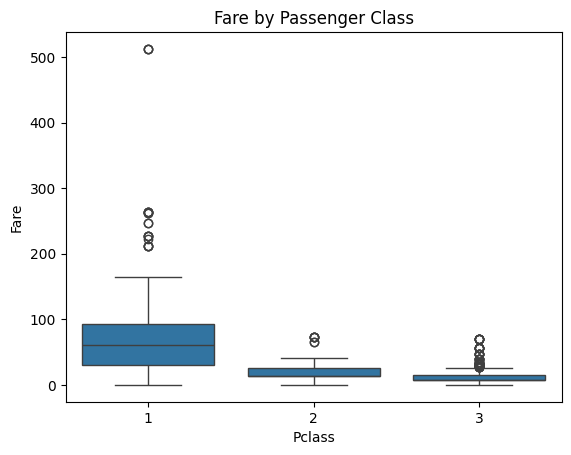

In [ ]:
# ===============================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ===============================
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

sns.histplot(data=df, x='Age', kde=True, hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

*Interpretation of the EDA Plots:*

1. **Survival Count by Gender (countplot):**
   - *Observation:* The plot shows a significantly higher survival rate for females compared to males. Most male passengers did not survive, while a majority of female passengers survived.
   - *Insight:* This aligns with the historical "women and children first" protocol during evacuations. Female passengers were prioritized for lifeboats, leading to their higher survival rate.

2. **Age Distribution by Survival (histplot with KDE):**
   - *Observation:*
     - Children ages 0–10 have a higher survival rate
     - Non-survivors are spread across adult ages 20–40, while survivors include more children and elderly passengers.
   - *Insight:* The crew prioritized vulnerable groups like children and the elderly. Younger adults aged 20–40 in lower classes may have had reduced access to lifeboats.
   

3. **Fare by Passenger Class (boxplot):**
   - *Observation:*
     - Median fare increases with class: 1st class which is Pclass 1 has the highest fares and 3rd class which is Pclass 3 has the lowest fares.
     - Outliers in 1st and 2nd classes indicate extremely expensive tickets
   - *Insight:* Pclass correlates with socioeconomic status. Higher fares in 1st class reflect luxury amenities.

